# ![Imgur](https://i.imgur.com/k2n4KOx.png)

DESCRIPTION OF DATA 

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.

The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

    Ticket #: Ticket number assigned to each complaint
    Customer Complaint: Description of complaint
    Date: Date of complaint
    Time: Time of complaint
    Received Via: Mode of communication of the complaint
    City: Customer city
    State: Customer state
    Zipcode: Customer zip
    Status: Status of complaint
    Filing on behalf of someone

Tasks Which We Will Be Performing : 

- Import data into R environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

    Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through theInternet and customer care calls.

The analysis results to be provided with insights wherever applicable.

## 1.  LOADING THE DATA


We will be Loading the Data into the R environment by using readXl library, after which by making the data ready for the analysis and so as to form conclusions where Comcast is lacking in serving their customers. 


In [1]:
library(readxl)
Data <- read.csv("../input/Comcast Telecom Complaints data.csv")
head(Data,4) #Printing Few Rows Of Data 
str(Data) #checking the structure of the dataset.


,Ticket..,Customer.Complaint,Date,Time,Received.Via,City,State,Zip.code,Status,Filing.on.Behalf.of.Someone
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>
1,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
3,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
4,277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes


'data.frame':	2224 obs. of  10 variables:
 $ Ticket..                   : Factor w/ 2224 levels "211255","211472",..: 371 124 307 611 849 1214 1763 1590 967 2110 ...
 $ Customer.Complaint         : Factor w/ 1841 levels "(Comcast is not my complaint!) Cyber Tele-marketing is my complaint!",..: 307 1519 1660 498 646 1353 1715 711 446 695 ...
 $ Date                       : Factor w/ 91 levels "13-04-2015","13-05-2015",..: 28 66 16 77 41 83 36 33 80 48 ...
 $ Time                       : Factor w/ 2190 levels "1:00:18 AM","1:00:32 PM",..: 1198 291 2165 652 89 2189 252 1666 594 1648 ...
 $ Received.Via               : Factor w/ 2 levels "Customer Care Call",..: 1 2 2 2 2 2 1 2 1 1 ...
 $ City                       : Factor w/ 928 levels "Abingdon","Acworth",..: 1 2 2 2 2 2 2 3 4 4 ...
 $ State                      : Factor w/ 43 levels "Alabama","Arizona",..: 19 11 11 11 11 11 11 21 4 4 ...
 $ Zip.code                   : int  21009 30102 30101 30101 30101 30101 30101 49221 94502 94501 ..

## 2. Cleaning The Data

Now, to perform this analysis we will extract the month from the given “Date” column and create a new column called “Month” where we store all the months when complaints are filed.
So, before extracting month we need to put the dates in the “Date” column in the correct format. 
By using the Lubridate library we will transform all the dates in a particular format which will make it easy for us to extract month and make analysis later. 


#### Formatting the Date Column as the code below, by using lubridate library available, similarly we will seperate month column as well from the given dates. To plot month data with complaints filed in that Month. 

In [2]:
#Loading The Date Into Single Format
#Use Lubridate Library to Format the Date Column
library(lubridate)
li<-parse_date_time(x = Data$Date,
                orders = c("d m y", "d B Y", "m/d/y"),
                locale = Sys.getlocale("LC_TIME"))
data2<-Data
data2$Date <- li
#Dates Loaded In the Same Format in the new Dataframe
#str(data2$Date)

#Extracting Month Column and Converting to The labels. 
data2$Month <- format(as.Date(data2$Date), "%m")
data2$Month<- month.abb[as.integer(data2$Month)]
head(data2)


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




,Ticket..,Customer.Complaint,Date,Time,Received.Via,City,State,Zip.code,Status,Filing.on.Behalf.of.Someone,Month
,<fct>,<fct>,<dttm>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<chr>
1,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr
2,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug
3,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr
4,277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul
5,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
6,338519,ISP Charging for arbitrary data limits with overage fees,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Dec


## 3. Analysis Of Data 

In [3]:
library(dplyr)
data_date<-data2 %>% group_by(Date) %>% dplyr::summarise(frequency = n())
df <-data_date[order(-data_date$frequency),]
dff<-head(df)
dff



Attaching package: ‘dplyr’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Date,frequency
<dttm>,<int>
2015-06-24,218
2015-06-23,190
2015-06-25,98
2015-06-26,55
2015-06-30,53
2015-06-29,51


#### Analysis:- This Above Data Frame Tells me that, on June 24 Comcast was reported with 218 complaints, particularly indicating a doomsday for the company to fix up many issues popping up on that day. 

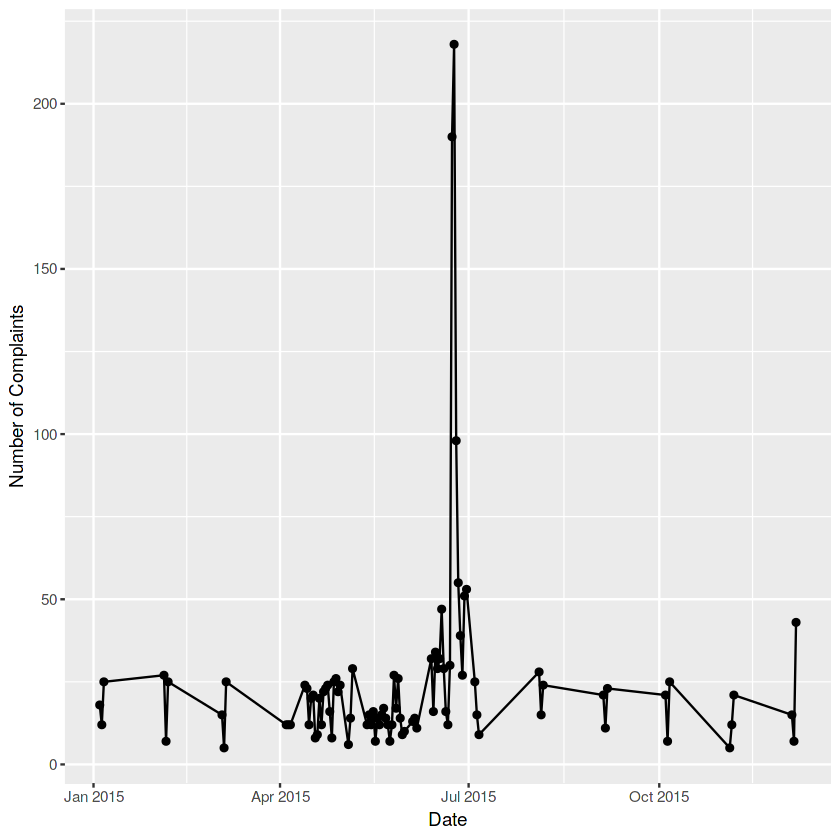

In [4]:
library(ggplot2)
ggplot(data_date, aes(Date, frequency, group = 1)) + 
  geom_point() + 
  geom_line() +
  xlab("Date") + 
  ylab("Number of Complaints")

#### Analysis:- Clearly, from the above Trend Graph, we can easily say that in the month of JUNE 2015, Comcast got reported with Maximum Number of complaints. 

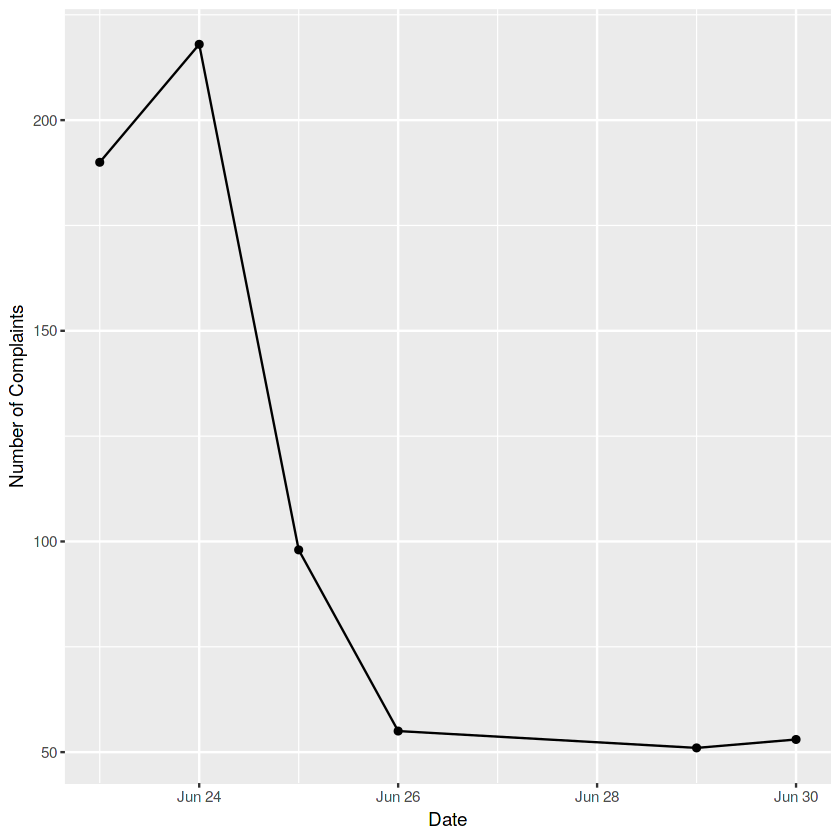

In [5]:
library(ggplot2)
ggplot(dff, aes(Date, frequency, group = 1)) + 
  geom_point() + 
  geom_line() +
  xlab("Date") + 
  ylab("Number of Complaints")

#### Analysis:- Clearly you can see on June 24, Company got reported with many complaints. This is the following trend for a few observations from the month of June 

In [6]:
data_month<-data2 %>% 
group_by(Month) %>% dplyr :: summarise(frequency = n())
data_month

Month,frequency
<chr>,<int>
Apr,375
Aug,67
Dec,65
Feb,59
Jan,55
Jul,49
Jun,1046
Mar,45
May,317


In [7]:
data2$Month <- as.factor(data2$Month)
levels(data2$Month)

[1] "Apr" "Aug" "Dec" "Feb" "Jan" "Jul" "Jun" "Mar" "May" "Nov" "Oct" "Sep"

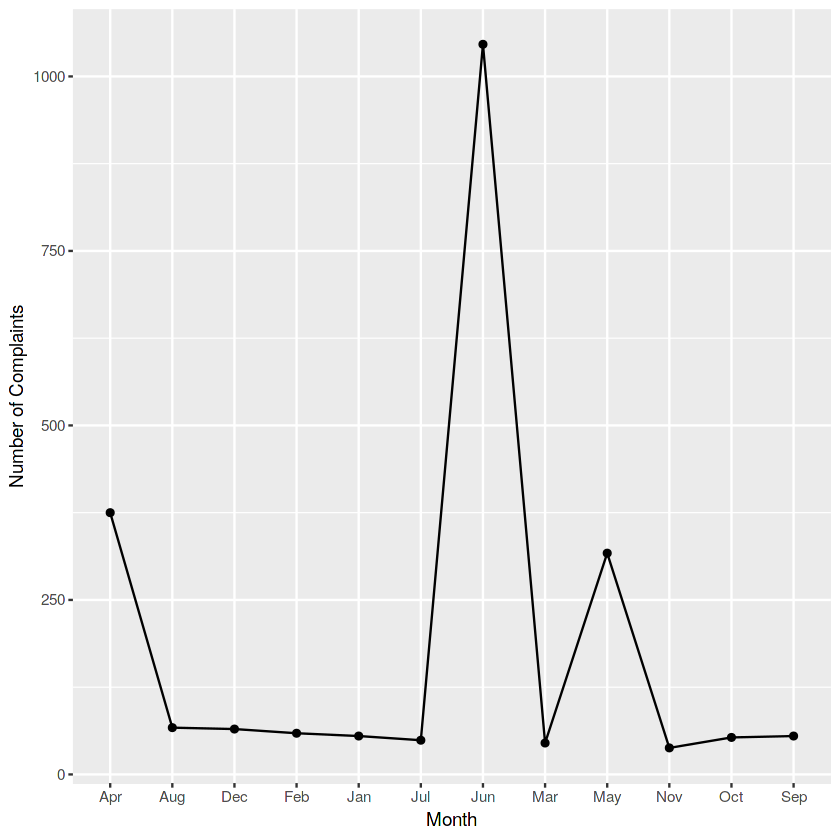

In [8]:
library(ggplot2)
ggplot(data_month, aes(Month, frequency, group = 1)) + 
  geom_point() + 
  geom_line() +
  xlab("Month") + 
  ylab("Number of Complaints")

#You only have to add group = 1 into the ggplot or geom_line aes().
#For line graphs, the data points must be grouped so that it knows which points to connect. 
#In this case, it is simple -- all points should be connected, so group=1. 
#When more variables are used and multiple lines are drawn, the grouping for lines is usually done by variable.


#### By, Now we have quite a good amount of insights by which we can clearly say that in the Month of June, date 24 company was filed with a maximum number of complaints.

### Frequency Table For Customer Complaints During Year 2015 - 2016 Period

In [9]:
library(dplyr)
#Converting All String Values to Lower, so as to Eliminate Duplication of Any Complaint
data3<-data2%>% mutate(Customer.Complaint = tolower(Customer.Complaint))
CustTable <- table(data3$Customer.Complaint)
CustTable <- data.frame(CustTable)
filtered<-CustTable %>% 
   rename(
       CustomerComplaintType = Var1,
       Frequency = Freq
    )
final <- filtered %>% arrange(desc(Frequency))

#Fetching The Top 20 complaints filed by customers on different days.
final_most<-head(final,20)
final_most


,CustomerComplaintType,Frequency
,<fct>,<int>
1,comcast,102
2,comcast data cap,30
3,comcast internet,29
4,comcast data caps,21
5,comcast billing,18
6,comcast service,15
7,internet speed,15
8,data caps,13
9,unfair billing practices,13


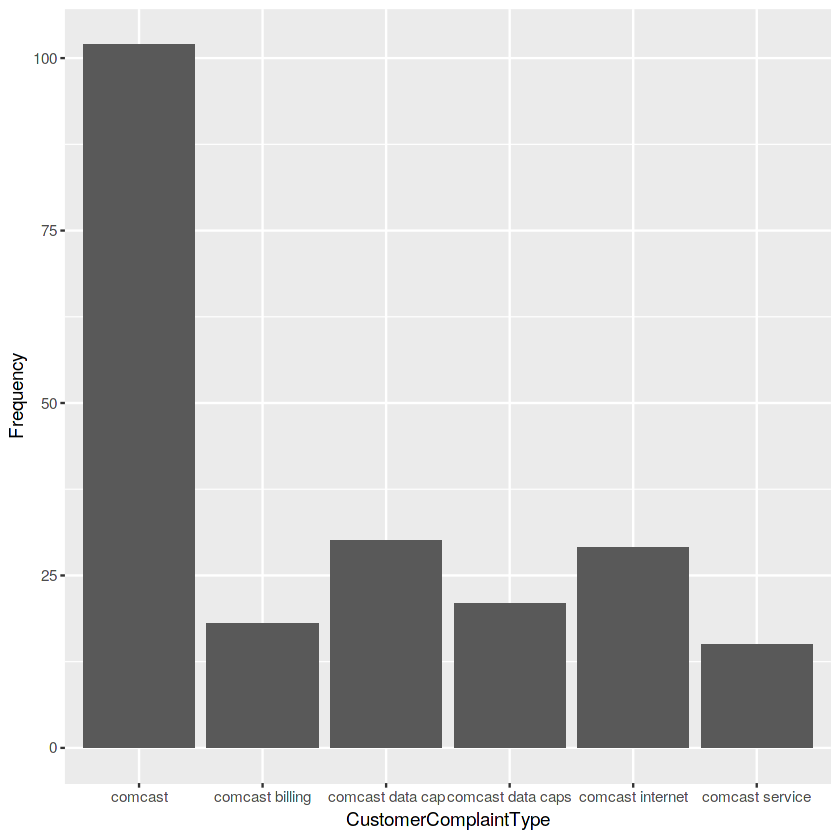

In [10]:
library(ggplot2)
ggplot(head(final_most,6), aes(CustomerComplaintType, Frequency)) +
  geom_bar(stat = "identity")

### Looking at the Above Table And Bar Plot :- 

Customer Are Mainly complaining about the Data Caps, Internet Speed, Billing Methods and Services that Comcast is Providing and Very few Cases were registered against Comcast Cable Services.

In [11]:
library(stringr)
library(tidyverse)
levels(Data$Status)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.3     ✔ readr   1.3.1
✔ tidyr   1.0.2     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



[1] "Closed"  "Open"    "Pending" "Solved"

In [12]:
library(plyr)
Data$Status_New<-revalue(Data$Status, c(Pending = "Open", Solved = "Closed"))
head(Data)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:purrr’:

    compact


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:lubridate’:

    here




,Ticket..,Customer.Complaint,Date,Time,Received.Via,City,State,Zip.code,Status,Filing.on.Behalf.of.Someone,Status_New
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
1,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
3,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
4,277946,Comcast Imposed a New Usage Cap of 300GB that punishes streaming.,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
5,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
6,338519,ISP Charging for arbitrary data limits with overage fees,6/12/2015,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


### Clearly looking at the above new created column Status1 has only two levels as required. We have merged Pending requests as Open and Solved Requests as Closed. 

In [13]:
levels(Data$State)

[1] "Alabama"              "Arizona"              "Arkansas"            
 [4] "California"           "Colorado"             "Connecticut"         
 [7] "Delaware"             "District of Columbia" "District Of Columbia"
[10] "Florida"              "Georgia"              "Illinois"            
[13] "Indiana"              "Iowa"                 "Kansas"              
[16] "Kentucky"             "Louisiana"            "Maine"               
[19] "Maryland"             "Massachusetts"        "Michigan"            
[22] "Minnesota"            "Mississippi"          "Missouri"            
[25] "Montana"              "Nevada"               "New Hampshire"       
[28] "New Jersey"           "New Mexico"           "New York"            
[31] "North Carolina"       "Ohio"                 "Oregon"              
[34] "Pennsylvania"         "Rhode Island"         "South Carolina"      
[37] "Tennessee"            "Texas"                "Utah"                
[40] "Vermont"              "Virginia"             "Washington"          
[43] "West Virginia"

In [14]:
tab <- table(Data$State,Data$Status_New)
tab <- cbind(tab, Total = rowSums(tab))
head(tab,15)

,Closed,Open,Total
Alabama,17,9,26
Arizona,14,6,20
Arkansas,6,0,6
California,159,61,220
Colorado,58,22,80
Connecticut,9,3,12
Delaware,8,4,12
District of Columbia,1,0,1
District Of Columbia,14,2,16
Florida,201,39,240



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




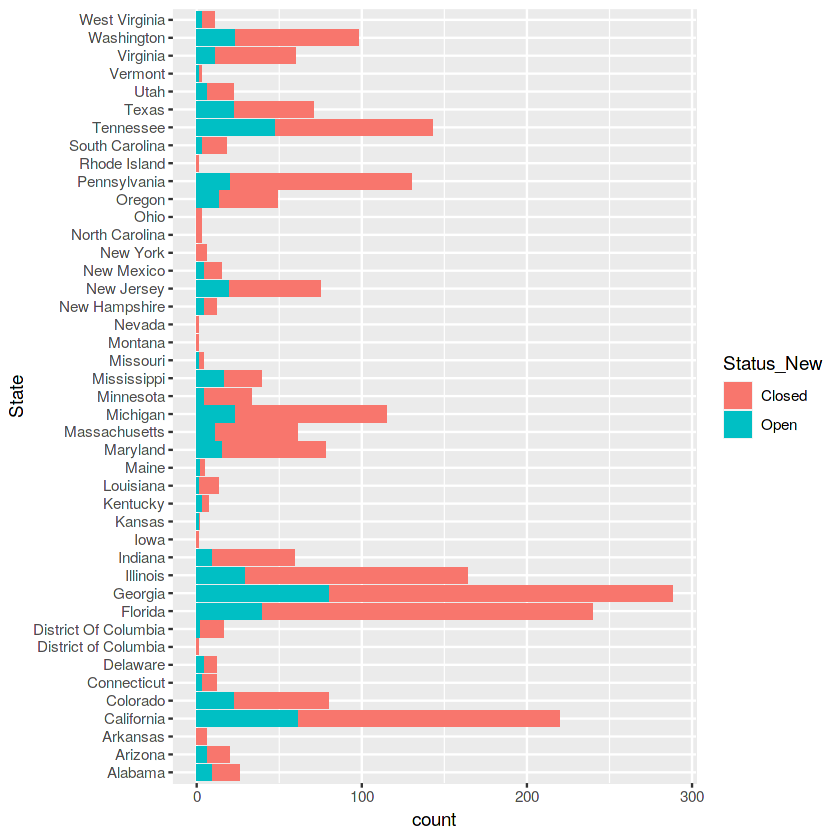

In [15]:
library(gridExtra)
ggplot(Data, aes(y = State)) + geom_bar(aes(fill = Status_New)) 


#### Analysis:- Clearly Looking at the chart we can say, Georgia and Florida are the Two where Comcast has a good number of Happy customers by solving the issues in bulk. 

In [16]:
levels(Data$Received.Via)

[1] "Customer Care Call" "Internet"

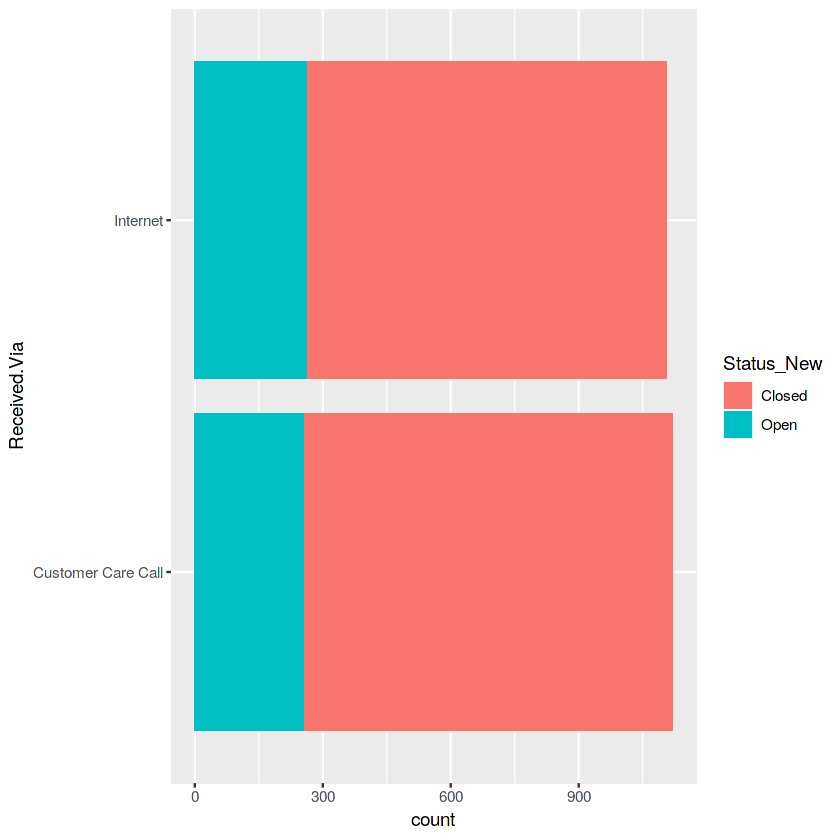

In [17]:
ggplot(Data, aes(y = Received.Via )) + geom_bar(aes(fill = Status_New)) 

In [18]:
df1 <- table(Data$Received.Via, Data$Status_New)
df1 <- cbind(df1, Total = rowSums(df1))
df1

,Closed,Open,Total
Customer Care Call,864,255,1119
Internet,843,262,1105


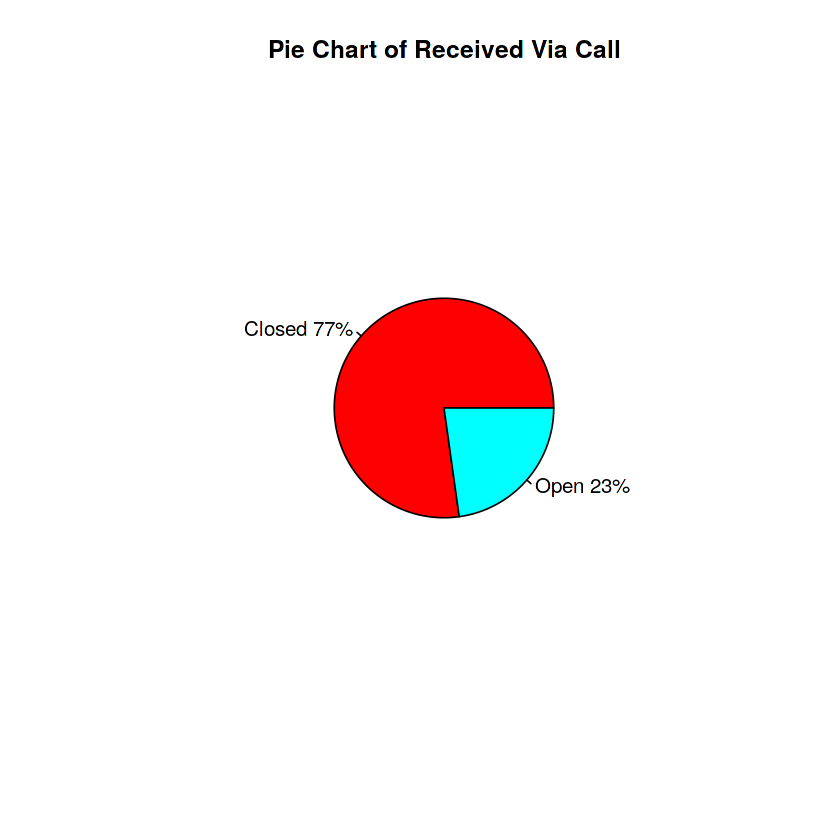

In [19]:

# Pie Chart with Percentages
slices <- c(864, 255)
lbls <- c("Closed", "Open")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Pie Chart of Received Via Call") 

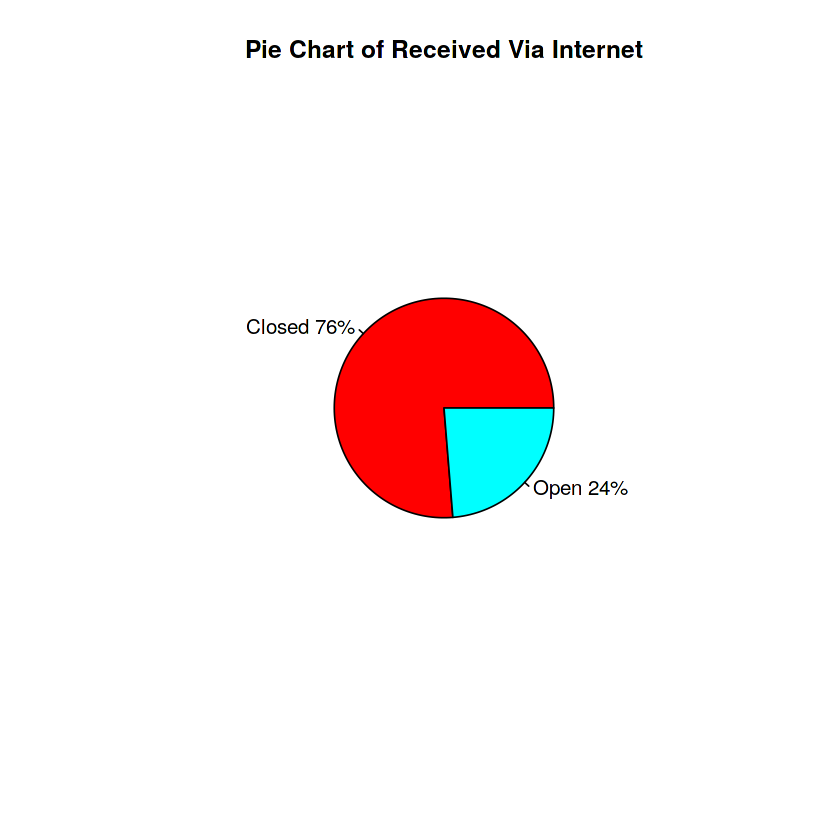

In [20]:
# Pie Chart with Percentages
slices <- c(843, 262)
lbls <- c("Closed", "Open")
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # ad % to labels
pie(slices,labels = lbls, col=rainbow(length(lbls)),
   main="Pie Chart of Received Via Internet") 

#### Solutions - 
1. The Company should Focus more on resolving complaints - Customer Are Mainly complaining about the Data Caps, Internet Speed, Billing Methods and Services that Comcast is Providing and Very few Cases were registered against Comcast Cable Services.

2. In Georgia and Florida company services are already Improving but,  in States - California, Colorado and Illinois company should extend their resources in terms of the above-mentioned issues in order to improve their customer servicing. 

3. During the month of June and the start of July, the Company reported lots of complaints, so as to for future reference they can keep this in check already so as to provide better services during these months. While working with their BPO clients to extend the staff during such days. Which ensures proper feedback for the particular arisen issue.

